<a href="https://colab.research.google.com/github/nivedithaa12/Customer-Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
file_path = '/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-7-96e0c461133b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

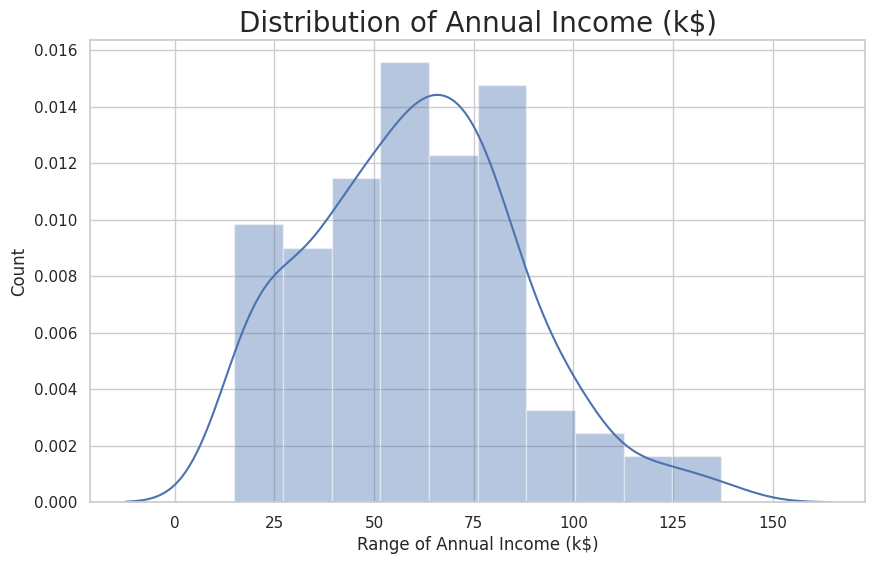

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

In [ ]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


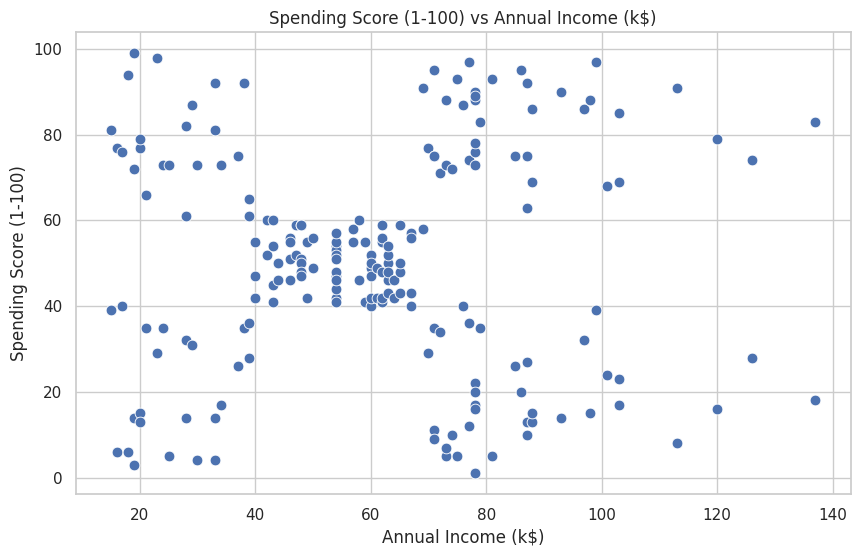

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

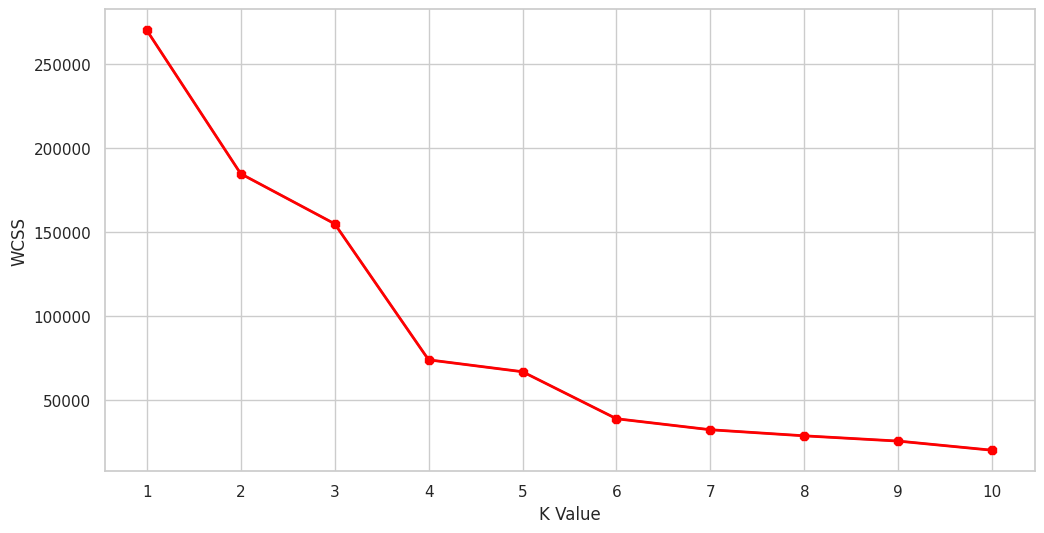

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


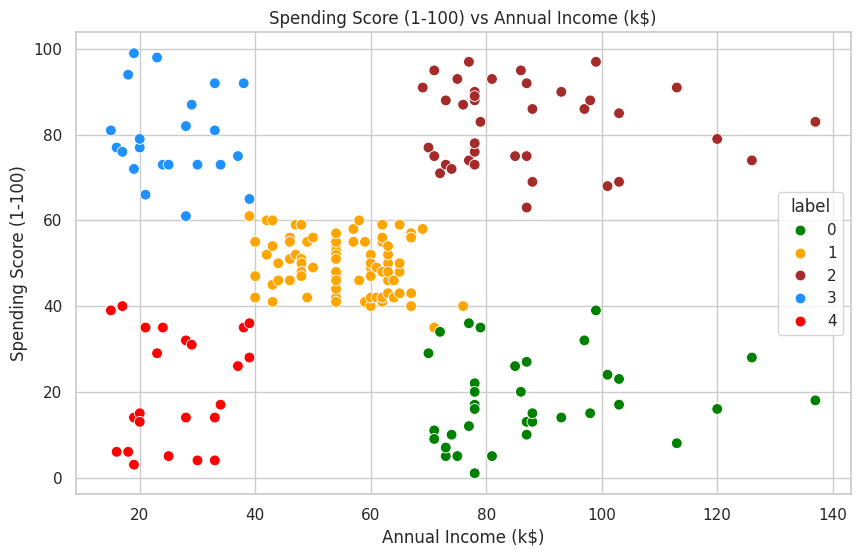

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

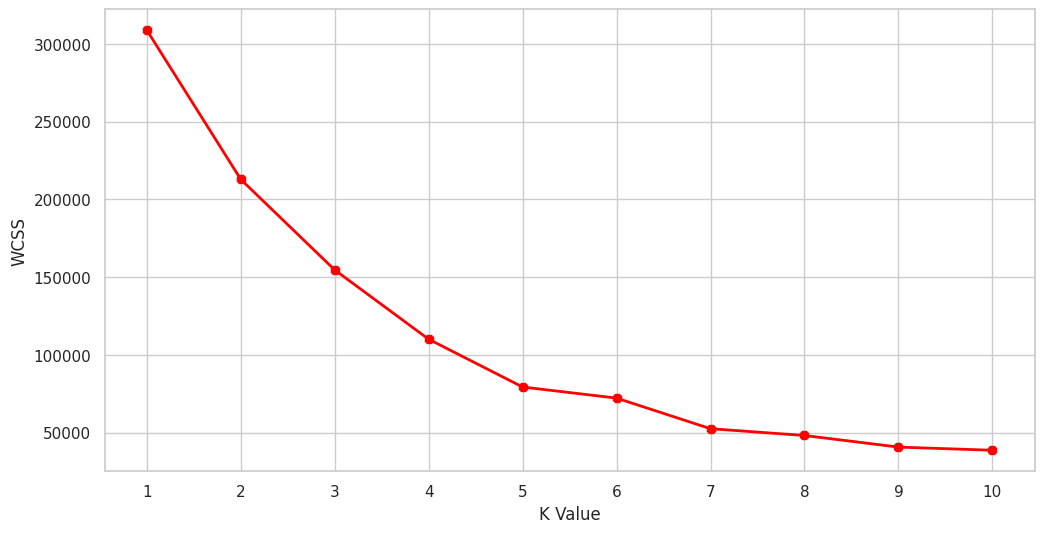

In [ ]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
pip install pymc3


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming 'data' is a DataFrame with the required columns
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['cluster']  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       1.00      1.00      1.00         2
           2       1.00      0.89      0.94         9
           3       1.00      0.93      0.97        15
           4       0.90      1.00      0.95         9

    accuracy                           0.95        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lgt = LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

lgt.fit(X_train, y_train)
accuracy_score(y_test, lgt.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8

In [ ]:
print("Logistic Regression Accuracy Score:", accuracy_score)

Logistic Regression Accuracy Score: <function accuracy_score at 0x7d148666a8c0>


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
lgt = LogisticRegression(max_iter=2000)  # Increase max_iter for convergence
lgt.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred_lgt = lgt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lgt)

print("Logistic Regression Accuracy Score:", accuracy)

Logistic Regression Accuracy Score: 0.9333333333333333


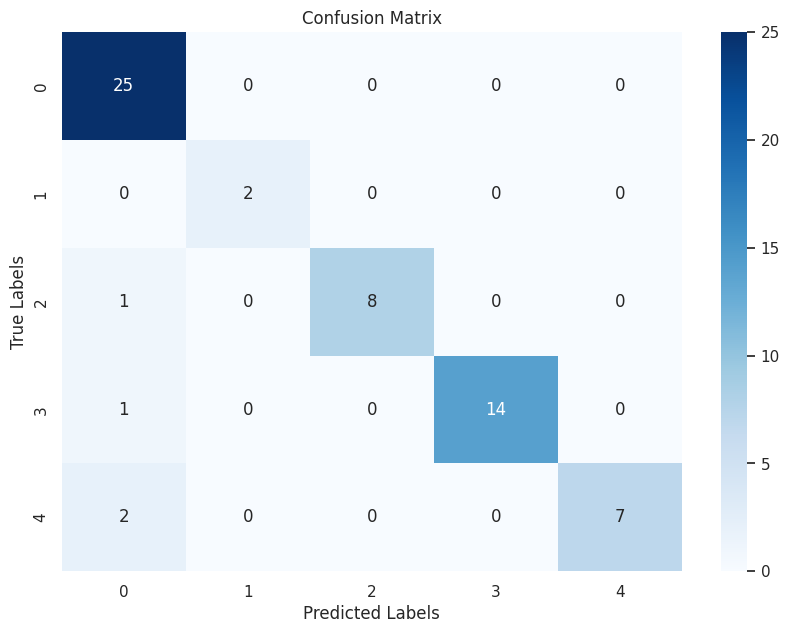

ValueError: y should be a 1d array, got an array of shape (60, 5) instead.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgt)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optionally, plot classification report metrics
report = classification_report(y_test, y_pred_lgt, output_dict=True)

# Plot Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, lgt.decision_function(X_test), pos_label=1)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

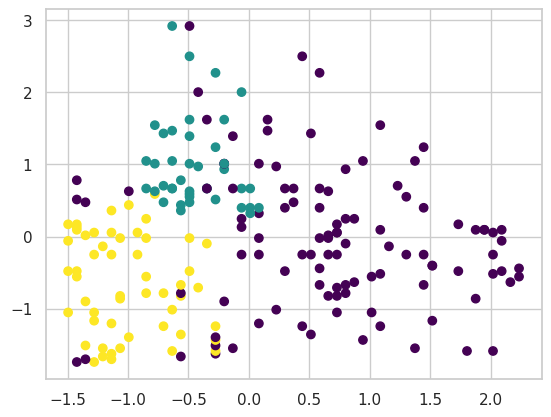

BIC: 1630.171347869294


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Fit the GMM model (set the number of clusters)
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit to the scaled data
gmm.fit(X_scaled)

# Predict the clusters
gmm_labels = gmm.predict(X_scaled)

# Visualize the clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.show()

# Evaluate using BIC
print(f'BIC: {gmm.bic(X_scaled)}')


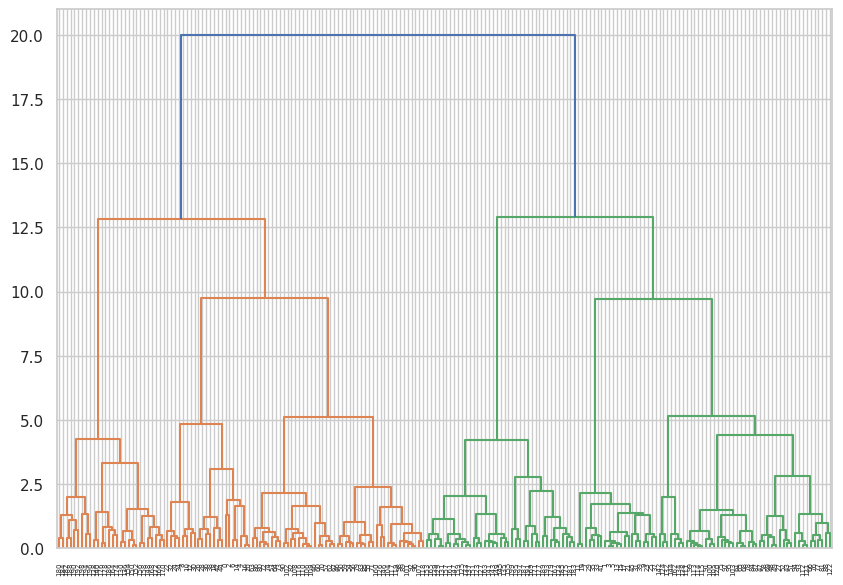

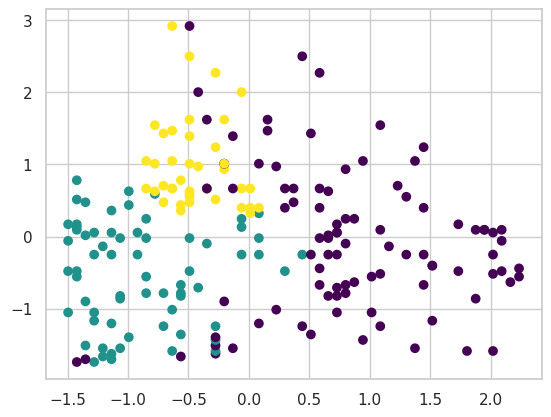

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage for the dendrogram (ward is a popular method)
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Now cut the dendrogram at a particular level (e.g., 3 clusters)
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit and predict the cluster labels
hier_labels = hierarchical.fit_predict(X_scaled)

# Visualize the clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hier_labels, cmap='viridis')
plt.show()


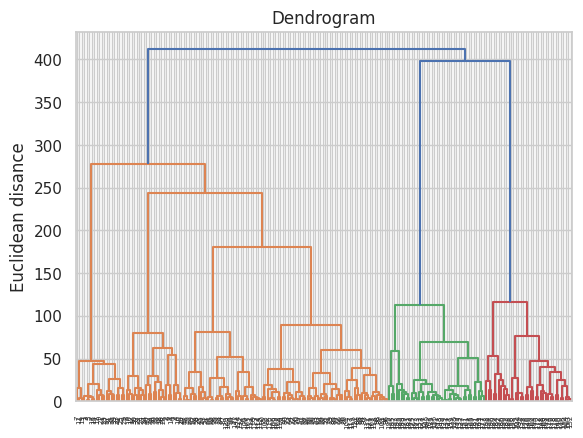

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
agglo_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglo_clustering_labels = agglo_clustering.fit_predict(X2)
agglo_clusters = agglo_clustering.fit_predict(X2)
df1["agglo_clustering_labels"] = agglo_clusters
from mpl_toolkits.mplot3d import Axes3D
Z = linkage(X2,method = 'ward')
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean disance')
plt.show
algorithms = ["K-Means","Hierarchical Clustering","MiniBatch K-Means"]

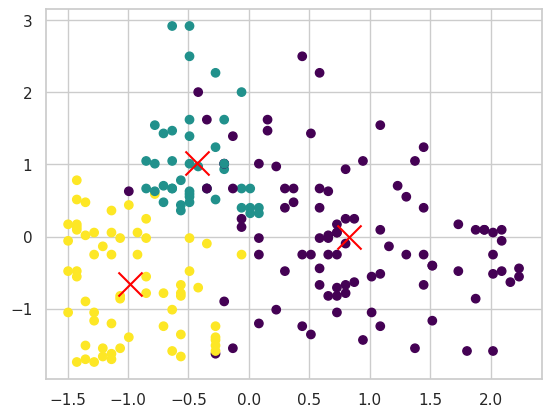

Silhouette Score: 0.3579234303882264


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming X is your dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Optionally scale your data

# Choose number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-means algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels
labels = kmeans.predict(X_scaled)

# To visualize the clusters (if 2D or 3D)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.show()

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')


In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(X2)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(X2, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.40546302077733304


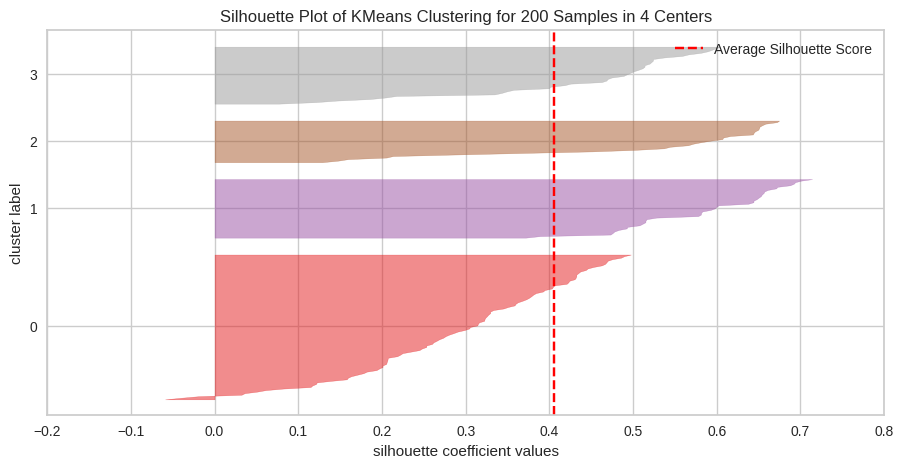

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.show()

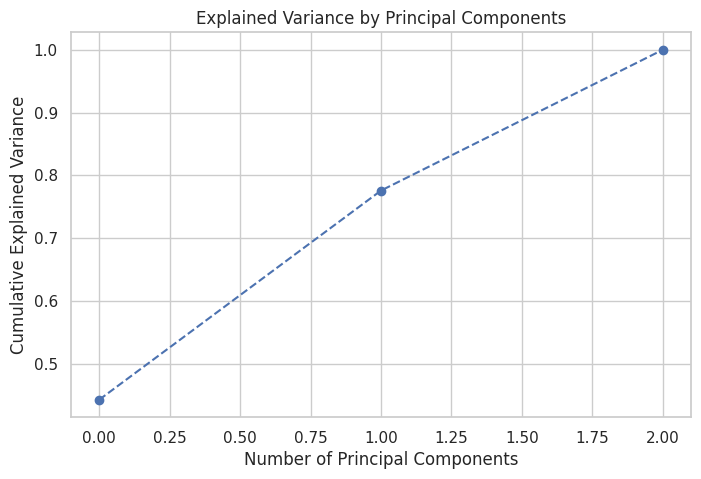

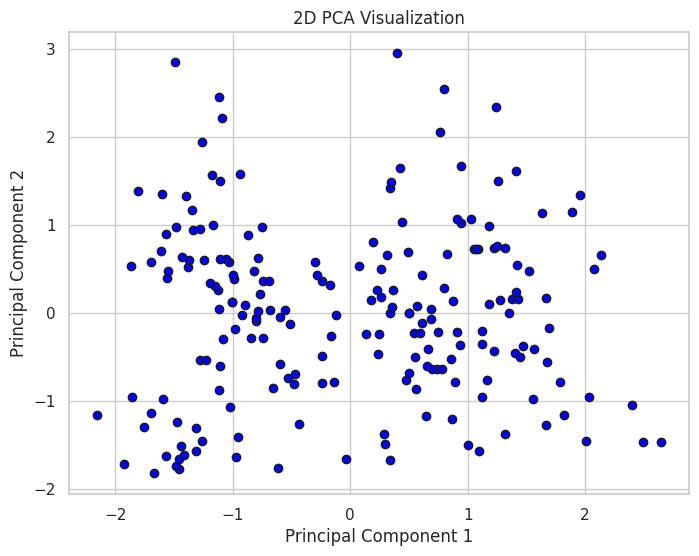

Variance explained by the first 2 components: 0.7757454566976747


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Perform PCA
# Set the number of components, you can start with all components (n_components=X.shape[1])
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# 3. Explained variance (to check how much variance each component captures)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# 4. Optionally, select a number of components (e.g., 2 or 3) and transform the data accordingly
# If you're reducing to 2 components for visualization:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# 5. Visualize the PCA-reduced data (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()

# Print the amount of variance explained by the selected components
print(f"Variance explained by the first 2 components: {np.sum(pca_2.explained_variance_ratio_)}")
